In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Exploratory Data Analysis

In [2]:
df = pd.read_csv("nonprofit.csv")

In [3]:
print(df.head())

   ID  ter1  ter2  ter3  ter4  ownd  kids  inc  sex  wlth  ...  npro  gifdol  \
0   1     0     0     1     0     1     1    4    1     8  ...    20      81   
1   2     0     0     1     0     1     2    4    0     8  ...    95     156   
2   5     0     0     1     0     1     0    4    1     4  ...    85     132   
3   6     0     1     0     0     1     1    5    0     9  ...    83     131   
4   7     0     0     0     0     1     3    4    0     8  ...    50      74   

   gifl  gifr  mdon  lag   gifa  donr  damt  valid  
0    81    19    17    6  21.05     0     0      0  
1    16    17    19    3  13.26     1    15      0  
2    15    10    10    6  12.07     1    17      1  
3     5     3    13    4   4.12     1    12      0  
4     6     5    22    3   6.50     0     0      1  

[5 rows x 24 columns]


In [77]:
print(df.isnull().sum())

ID        0
ter1      0
ter2      0
ter3      0
ter4      0
ownd      0
kids      0
inc       0
sex       0
wlth      0
hv        0
incmed    0
incavg    0
low       0
npro      0
gifdol    0
gifl      0
gifr      0
mdon      0
lag       0
gifa      0
donr      0
damt      0
valid     0
dtype: int64


In [5]:
print(df.describe())

                ID         ter1         ter2         ter3         ter4  \
count  6002.000000  6002.000000  6002.000000  6002.000000  6002.000000   
mean   3978.908197     0.201433     0.347051     0.121293     0.132456   
std    2301.807612     0.401104     0.476072     0.326495     0.339014   
min       1.000000     0.000000     0.000000     0.000000     0.000000   
25%    1985.250000     0.000000     0.000000     0.000000     0.000000   
50%    3945.500000     0.000000     0.000000     0.000000     0.000000   
75%    5963.750000     0.000000     1.000000     0.000000     0.000000   
max    8009.000000     1.000000     1.000000     1.000000     1.000000   

              ownd         kids          inc          sex         wlth  ...  \
count  6002.000000  6002.000000  6002.000000  6002.000000  6002.000000  ...   
mean      0.884538     1.583972     3.939020     0.607797     7.023159  ...   
std       0.319605     1.412455     1.401887     0.488282     2.330964  ...   
min       0.00000

In [6]:
print(df.dtypes)

ID          int64
ter1        int64
ter2        int64
ter3        int64
ter4        int64
ownd        int64
kids        int64
inc         int64
sex         int64
wlth        int64
hv          int64
incmed      int64
incavg      int64
low         int64
npro        int64
gifdol      int64
gifl        int64
gifr        int64
mdon        int64
lag         int64
gifa      float64
donr        int64
damt        int64
valid       int64
dtype: object


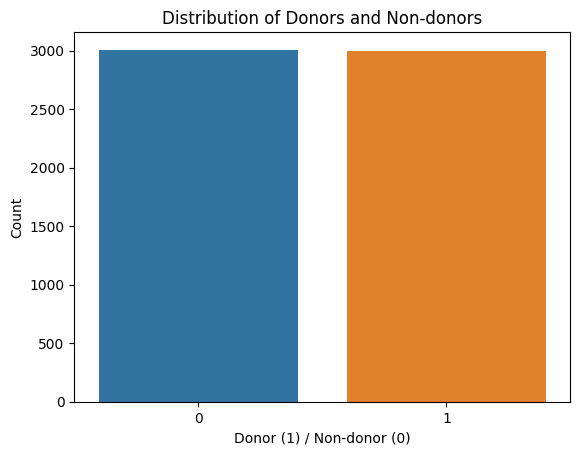

In [7]:
sns.countplot(x='donr', data=df)
plt.title('Distribution of Donors and Non-donors')
plt.xlabel('Donor (1) / Non-donor (0)')
plt.ylabel('Count')
plt.show()


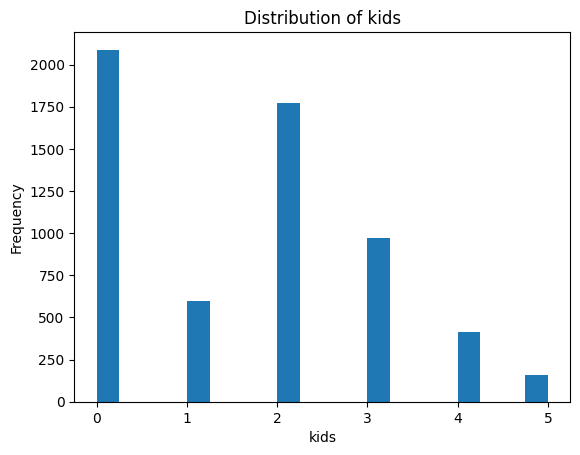

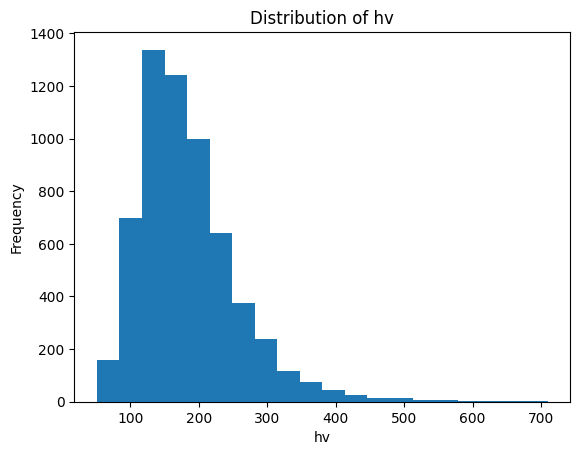

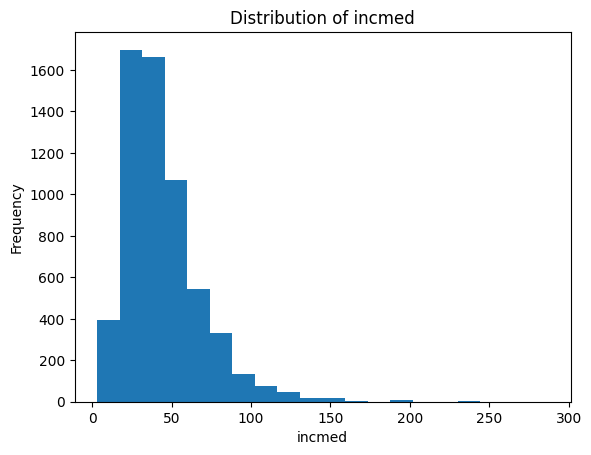

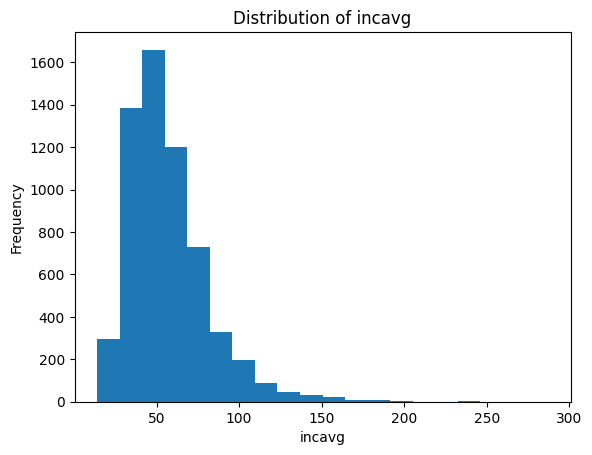

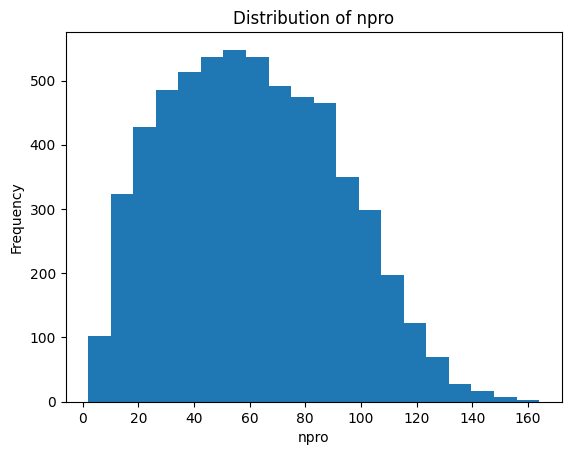

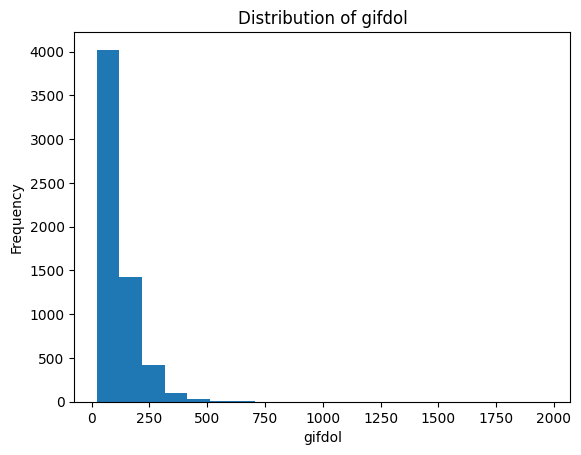

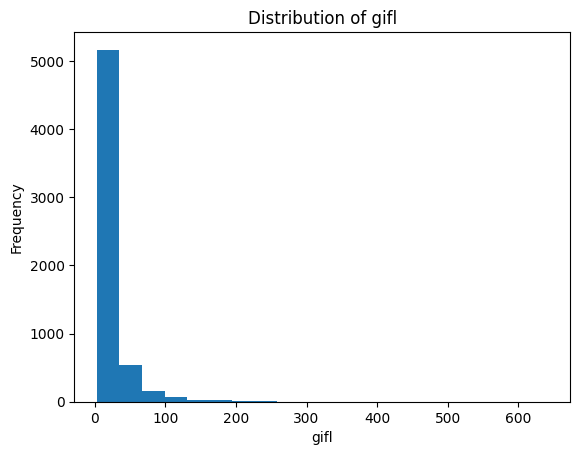

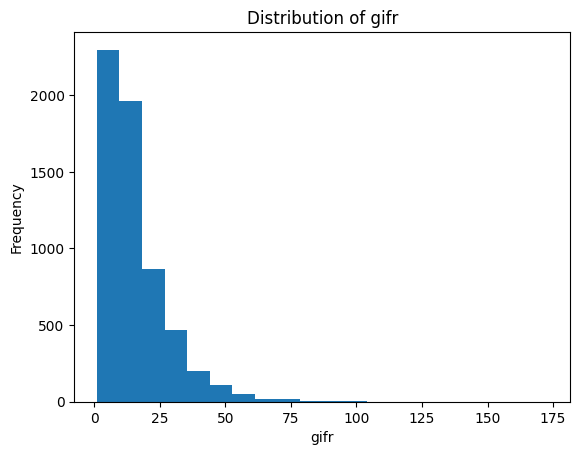

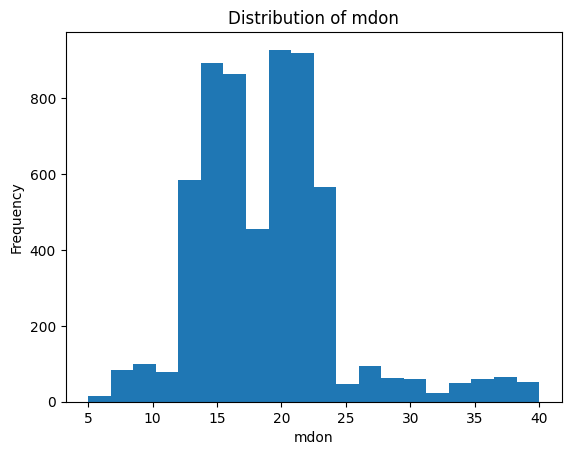

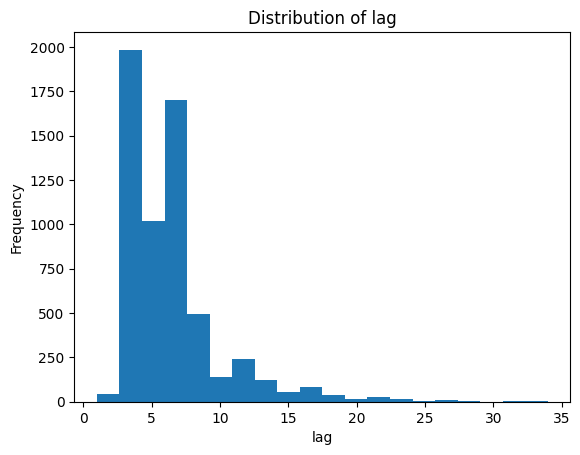

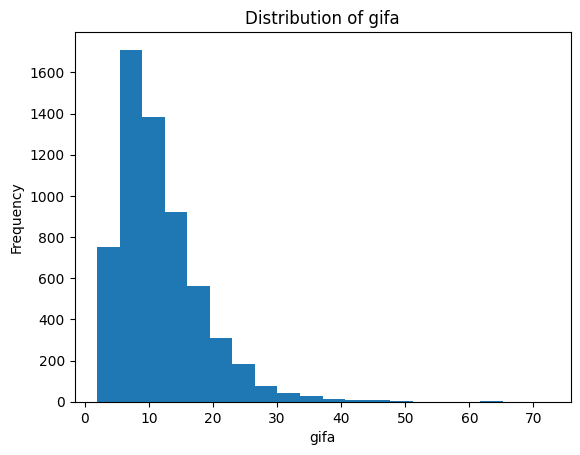

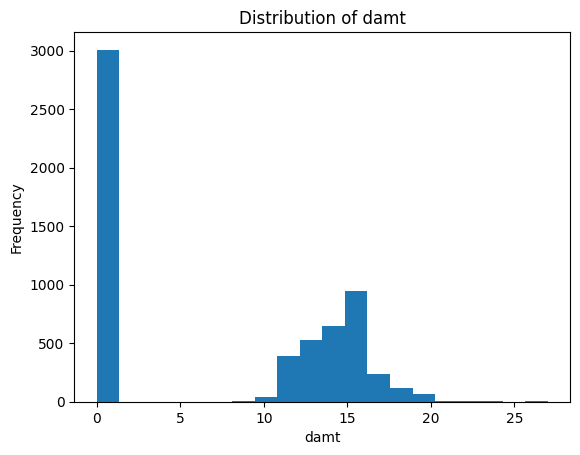

In [8]:
numeric_cols = ['kids', 'hv', 'incmed', 'incavg', 'npro', 'gifdol', 'gifl', 'gifr', 'mdon', 'lag', 'gifa', 'damt']
for col in numeric_cols:
    plt.hist(df[col], bins=20)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()


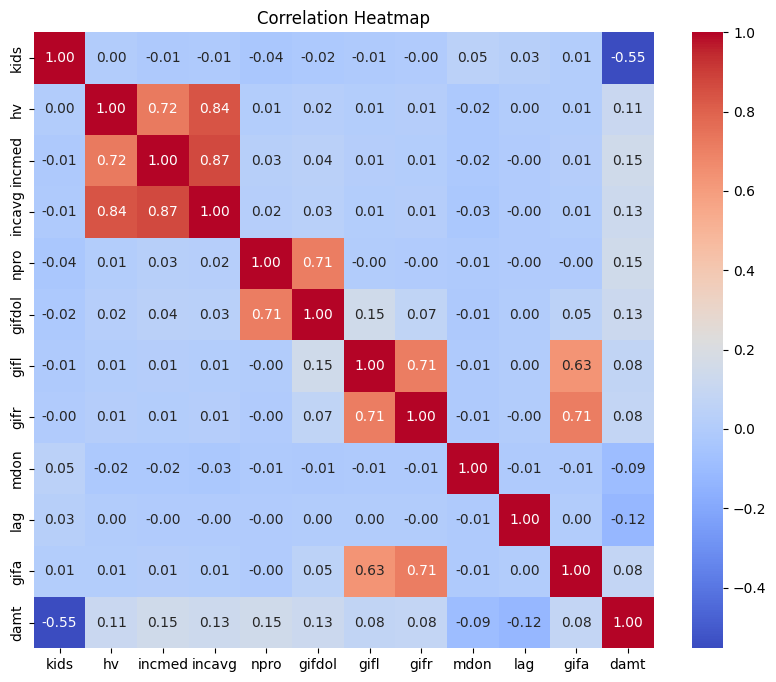

In [9]:
plt.figure(figsize=(10, 8))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

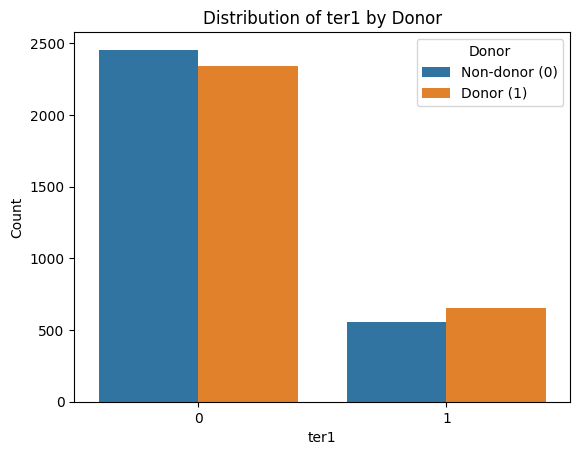

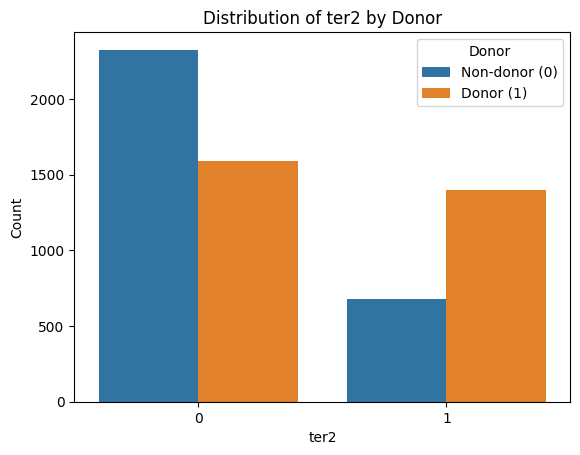

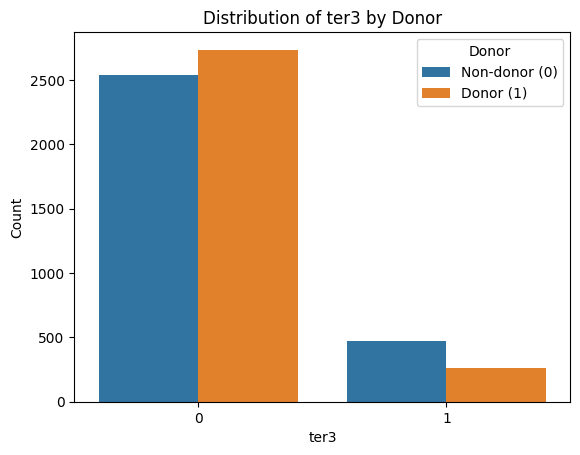

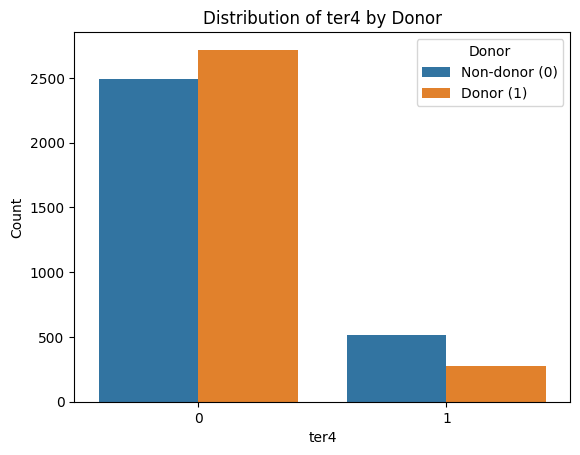

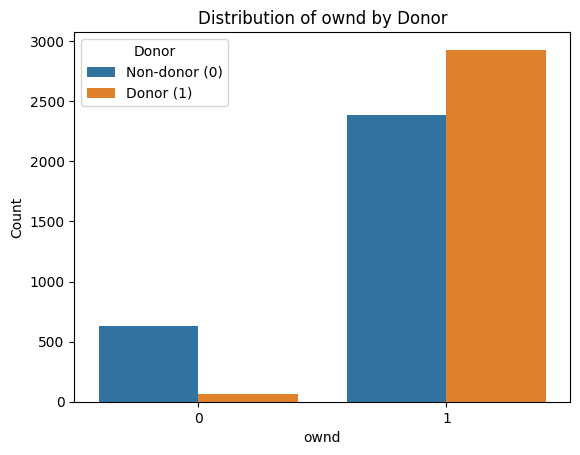

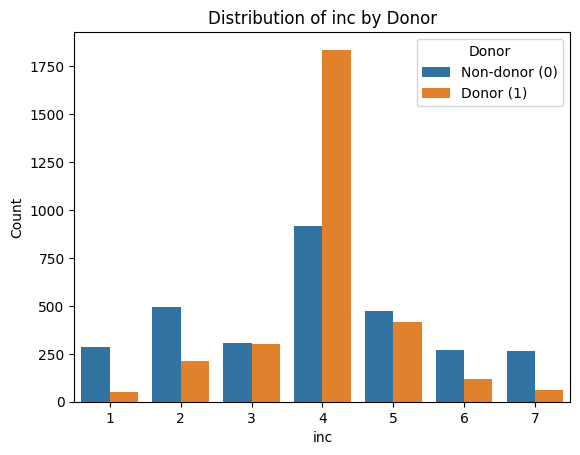

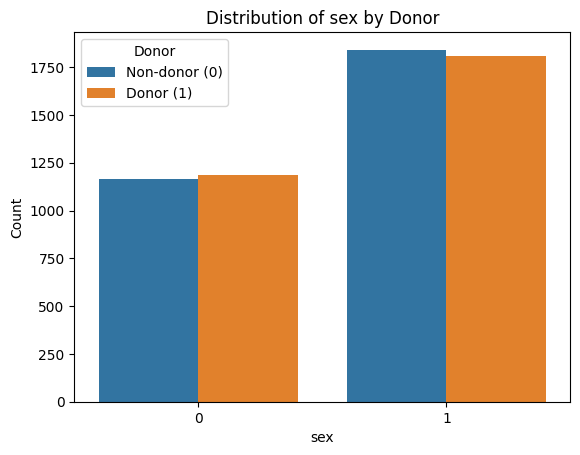

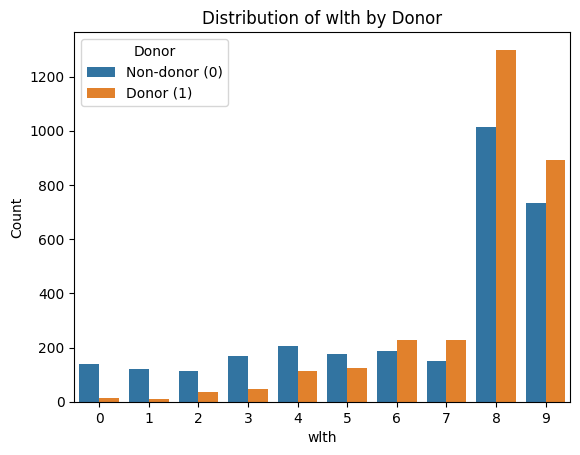

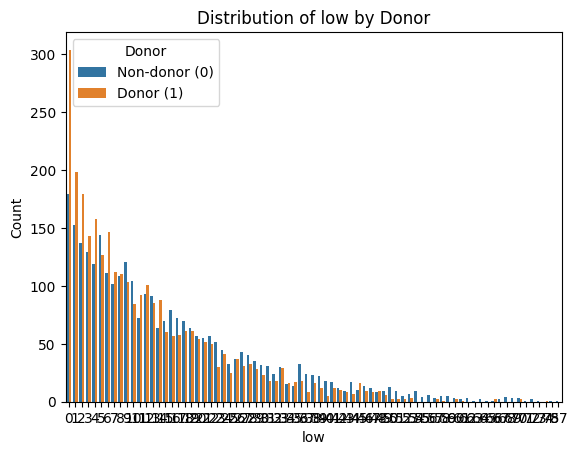

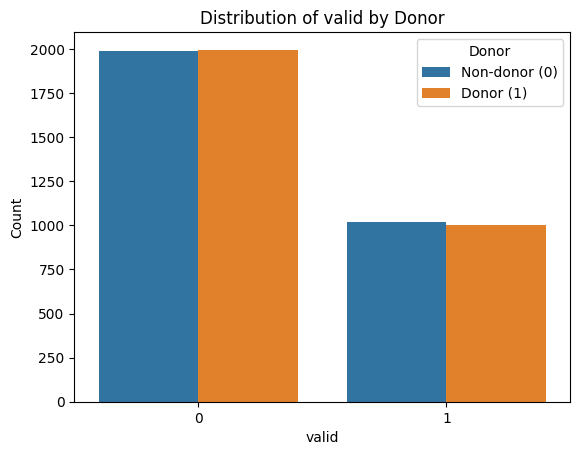

In [10]:
categorical_cols = ['ter1', 'ter2', 'ter3', 'ter4', 'ownd', 'inc', 'sex', 'wlth', 'low', 'valid']
for col in categorical_cols:
    sns.countplot(x=col, hue='donr', data=df)
    plt.title(f'Distribution of {col} by Donor')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.legend(title='Donor', labels=['Non-donor (0)', 'Donor (1)'])
    plt.show()

# Classification Model for DONR

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [13]:
# Remove ID and DAMT columns from predictor variables
X = df.drop(columns=['ID', 'damt', 'donr'])

# Target variable
y = df['donr']


In [14]:
# Split the dataset into training (80%) and validation (20%) sets
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the predictor variables
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)

In [15]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)


KNeighborsClassifier()

In [16]:
nn_model = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=200)
nn_model.fit(X_train_scaled, y_train)


MLPClassifier(hidden_layer_sizes=(100, 50))

In [17]:
logreg_model = LogisticRegression()
logreg_model.fit(X_train_scaled, y_train)

LogisticRegression()

In [18]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [19]:
models = [knn_model, nn_model, logreg_model, rf_model]
model_names = ['K-Nearest Neighbors', 'Neural Network', 'Logistic Regression', 'Random Forest']
for model, name in zip(models, model_names):
    y_pred = model.predict(X_valid_scaled)
    accuracy = accuracy_score(y_valid, y_pred)
    precision = precision_score(y_valid, y_pred)
    recall = recall_score(y_valid, y_pred)
    f1 = f1_score(y_valid, y_pred)
    roc_auc = roc_auc_score(y_valid, y_pred)
    print(f'{name} Results:')
    print(f'Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-Score: {f1:.4f}, ROC-AUC: {roc_auc:.4f}')
    print()

K-Nearest Neighbors Results:
Accuracy: 0.8060, Precision: 0.7490, Recall: 0.9161, F1-Score: 0.8242, ROC-AUC: 0.8068

Neural Network Results:
Accuracy: 0.8784, Precision: 0.8689, Recall: 0.8893, F1-Score: 0.8789, ROC-AUC: 0.8785

Logistic Regression Results:
Accuracy: 0.8476, Precision: 0.8293, Recall: 0.8725, F1-Score: 0.8504, ROC-AUC: 0.8478

Random Forest Results:
Accuracy: 0.5037, Precision: 0.0000, Recall: 0.0000, F1-Score: 0.0000, ROC-AUC: 0.5000



E:\Python\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
E:\Python\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [20]:
best_model = nn_model

In [31]:
score_df = pd.read_csv("scores.csv")

In [32]:
X_score = score_df.drop(columns=['ID', 'donr'])
X_score_scaled = scaler.transform(X_score)

In [33]:
# Predict DONR responses using the best model
score_predictions = best_model.predict(X_score_scaled)

In [34]:
# Add the predictions to the score dataset
score_df['donr_prediction'] = score_predictions

In [35]:
score_df.to_csv('score_dataset_with_predictions.csv', index=False)

# DAMT Variable

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error


In [40]:
df = pd.read_csv("nonprofit.csv")

In [64]:
# Remove ID and DONR columns from predictor variables
X_damt = df[df['donr'] == 1].drop(columns=['ID', 'donr', 'damt'])  # Use only donor records

# Target variable for DAMT prediction
y_damt = df[df['donr'] == 1]['damt']  # Use only records where DONR = 1 (donors)

In [65]:
# Split the dataset into training (80%) and validation (20%) sets
X_train_damt, X_valid_damt, y_train_damt, y_valid_damt = train_test_split(X_damt, y_damt, test_size=0.2, random_state=42)

# Standardize the predictor variables
scaler_damt = StandardScaler()
X_train_scaled_damt = scaler_damt.fit_transform(X_train_damt)
X_valid_scaled_damt = scaler_damt.transform(X_valid_damt)

In [66]:
linear_model_damt = LinearRegression()
linear_model_damt.fit(X_train_scaled_damt, y_train_damt)

LinearRegression()

In [67]:
nn_model_damt = MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=200)
nn_model_damt.fit(X_train_scaled_damt, y_train_damt)

E:\Python\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(hidden_layer_sizes=(100, 50))

In [68]:
dt_model_damt = DecisionTreeRegressor(random_state=42)
dt_model_damt.fit(X_train_damt, y_train_damt)


DecisionTreeRegressor(random_state=42)

In [69]:
rf_model_damt = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model_damt.fit(X_train_damt, y_train_damt)

RandomForestRegressor(random_state=42)

In [70]:
models_damt = [linear_model_damt, nn_model_damt, dt_model_damt, rf_model_damt]
model_names_damt = ['Linear Regression', 'Neural Network', 'Decision Tree Regression', 'Random Forest Regression']
for model, name in zip(models_damt, model_names_damt):
    y_pred_damt = model.predict(X_valid_scaled_damt)
    mse = mean_squared_error(y_valid_damt, y_pred_damt)
    print(f'{name} Results:')
    print(f'Mean Squared Error (MSE): {mse:.4f}')
    print()

Linear Regression Results:
Mean Squared Error (MSE): 1.7053

Neural Network Results:
Mean Squared Error (MSE): 1.7811

Decision Tree Regression Results:
Mean Squared Error (MSE): 38.5376

Random Forest Regression Results:
Mean Squared Error (MSE): 10.8505



E:\Python\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
E:\Python\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [71]:
best_model_damt = linear_model_damt

In [72]:
score_damt_df = pd.read_csv("scores.csv")

In [73]:
# Preprocess the score dataset
X_score_damt = score_damt_df.drop(columns=['ID', 'donr'])
X_score_scaled_damt = scaler_damt.transform(X_score_damt)

In [74]:
score_damt_predictions = best_model_damt.predict(X_score_damt)

E:\Python\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [75]:
score_damt_df['damt_prediction'] = score_damt_predictions

In [76]:
score_damt_df.to_csv('score_dataset_damt_predictions.csv', index=False)